In [1]:
import pandas as pd
import glob
from pathlib import Path
import os

In [2]:
from datasets import ClassLabel, Dataset, Features, Image, Value, Sequence, DatasetDict
from PIL import Image as PImage, ImageOps
import numpy as np

In [3]:
label_dic={"good":0, "usable": 1,"reject":2}

In [4]:
path =os.getcwd()
path_data_train = os.path.join(path , "canal", "train")
path_data_validation =os.path.join(path , "canal", "val")
path_data_test =os.path.join(path , "canal", "test")

In [5]:
path_data_train

'F:\\repos\\test_retina\\canal\\train'

In [6]:

Clabels= ClassLabel(num_classes=3, names=["good", "usable", "reject"])

In [8]:
import os
import glob

list_images=[]
list_path=[]
list_labels=[]


from fnmatch import fnmatch
pattern = "*.jpeg"

# Train Dataset
for root, subdirs, files in os.walk(path_data_train):
    
    for name in files:
        
      #if fnmatch(name, pattern):
          abs_path = (os.path.join(root, name))

          # abs_path
          category=abs_path.split("\\")[-2]
          #print(category)
          # name
          temp  = PImage.open(abs_path)
          image = temp.copy()
          # image = ImageOps.contain(image, (400,400))
          list_images.append(image)
          list_path.append(abs_path)
          list_labels.append(label_dic.get(category))
          temp.close()

In [9]:

dtrain= { "image": list_images, "image_file_path": list_path, "labels":list_labels}
ds_train = Dataset.from_dict(mapping=dtrain, features=Features({"labels": Value(dtype='int8'), 'image_file_path': Value(dtype='string'), 'image': Image()}))
ds_train = ds_train.cast_column("labels", Clabels)
ds_train = ds_train.shuffle(seed=42)
ds_train

Casting the dataset:   0%|          | 0/9000 [00:00<?, ? examples/s]

Dataset({
    features: ['image', 'image_file_path', 'labels'],
    num_rows: 9000
})

In [10]:
# Validation Dataset
list_images=[]
list_path=[]
list_labels=[]
list_cats=[]


# validation Dataset
for path, subdirs, files in os.walk(path_data_validation):
    for name in files:
      if fnmatch(name, pattern):
            abs_path = (os.path.join(path, name))
            # abs_path
            category=abs_path.split("\\")[-2]
            # name
            temp  = PImage.open(abs_path)
            image = temp.copy()
            # image = ImageOps.contain(image, (400,400))
            list_images.append(image)
            list_path.append(abs_path)
            list_labels.append(label_dic.get(category))
            list_cats.append(category)
            temp.close()



dvalidation= { "image": list_images, "image_file_path": list_path, "labels":list_labels}
ds_validation = Dataset.from_dict(mapping=dvalidation, features=Features({"labels": Value(dtype='int8'), 'image_file_path': Value(dtype='string'), 'image': Image()}))
ds_validation = ds_validation.cast_column("labels", Clabels)
ds_validation

Casting the dataset:   0%|          | 0/1200 [00:00<?, ? examples/s]

Dataset({
    features: ['image', 'image_file_path', 'labels'],
    num_rows: 1200
})

In [11]:

# test Dataset
list_images=[]
list_path=[]
list_labels=[]
list_cats=[]


# test Dataset
for path, subdirs, files in os.walk(path_data_test):
    for name in files:
      if fnmatch(name, pattern):
            abs_path = (os.path.join(path, name))
            # abs_path
            category=abs_path.split("\\")[-2]
            # name
            temp  = PImage.open(abs_path)
            image = temp.copy()
            #iimage = ImageOps.contain(image, (400,400))
            list_images.append(image)
            list_path.append(abs_path)
            list_labels.append(label_dic.get(category))
            list_cats.append(category)
            temp.close()



dtest= { "image": list_images, "image_file_path": list_path, "labels":list_labels}
ds_test = Dataset.from_dict(mapping=dtest, features=Features({"labels": Value(dtype='int8'), 'image_file_path': Value(dtype='string'), 'image': Image()}))
ds_test = ds_test.cast_column("labels", Clabels)
ds_test

Casting the dataset:   0%|          | 0/1200 [00:00<?, ? examples/s]

Dataset({
    features: ['image', 'image_file_path', 'labels'],
    num_rows: 1200
})

In [12]:
ds = DatasetDict({"train": ds_train, "validation": ds_validation, "test": ds_test})
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'image_file_path', 'labels'],
        num_rows: 9000
    })
    validation: Dataset({
        features: ['image', 'image_file_path', 'labels'],
        num_rows: 1200
    })
    test: Dataset({
        features: ['image', 'image_file_path', 'labels'],
        num_rows: 1200
    })
})

# Review the dataset
Let's start by loading a small image classification dataset and taking a look at its structure.

1. image: A PIL Image
2. image_file_path: The str path to the image file that was loaded as image
3. labels: A datasets.ClassLabel feature, which we'll see as an integer representation of the label for a given example. (Later we'll see how to get the string class names, don't worry)

In [13]:
ex = ds['train'][400]
ex

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=587x587>,
 'image_file_path': 'F:\\repos\\test_retina\\canal\\train\\reject\\18969_left.jpeg',
 'labels': 2}

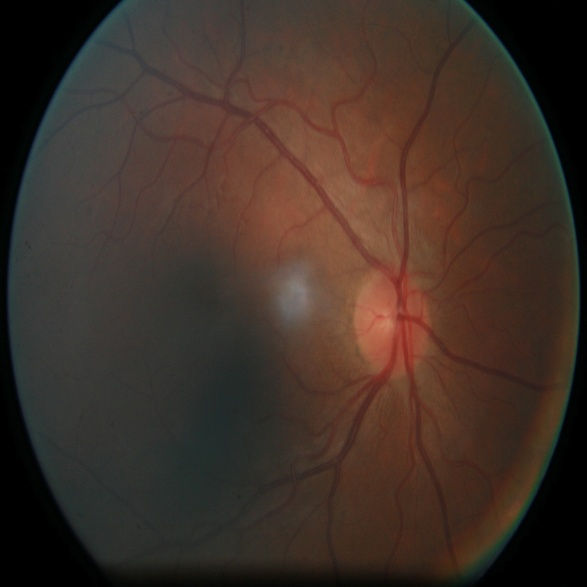

In [14]:

image = ex['image']
image

In [15]:

labels = ds['train'].features['labels']
labels

ClassLabel(names=['good', 'usable', 'reject'], id=None)

# Save Dataset to Local


In [16]:
path =os.getcwd()

In [17]:
dataset_path = os.path.join(path ,"datasets")
dataset_path

'F:\\repos\\test_retina\\datasets'

In [18]:

ds_train.save_to_disk(os.path.join(dataset_path,"train.hf"))
ds_validation.save_to_disk(os.path.join(dataset_path,"validation.hf"))
ds_test.save_to_disk(os.path.join(dataset_path,"test.hf"))

Saving the dataset (0/6 shards):   0%|          | 0/9000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1200 [00:00<?, ? examples/s]